   Flow Duration  Fwd Packet Length Max  Fwd Packet Length Min  \
0         910918                    435                    0.0   
1        8034272                    559                    0.0   
2       22525345                    409                    0.0   
3         203385                   1350                   38.0   
4         514920                    528                    0.0   

   Fwd Packet Length Mean  Fwd Packet Length Std  Bwd Packet Length Max  \
0               71.647059             149.236365                   1448   
1              195.454545             261.894774                    508   
2               36.310345              99.655515                   1448   
3              694.666667             717.882349                   1350   
4              105.600000             236.128778                    290   

   Bwd Packet Length Min  Bwd Packet Length Mean  Bwd Packet Length Std  \
0                    0.0             1183.157895             429.871074   
1 

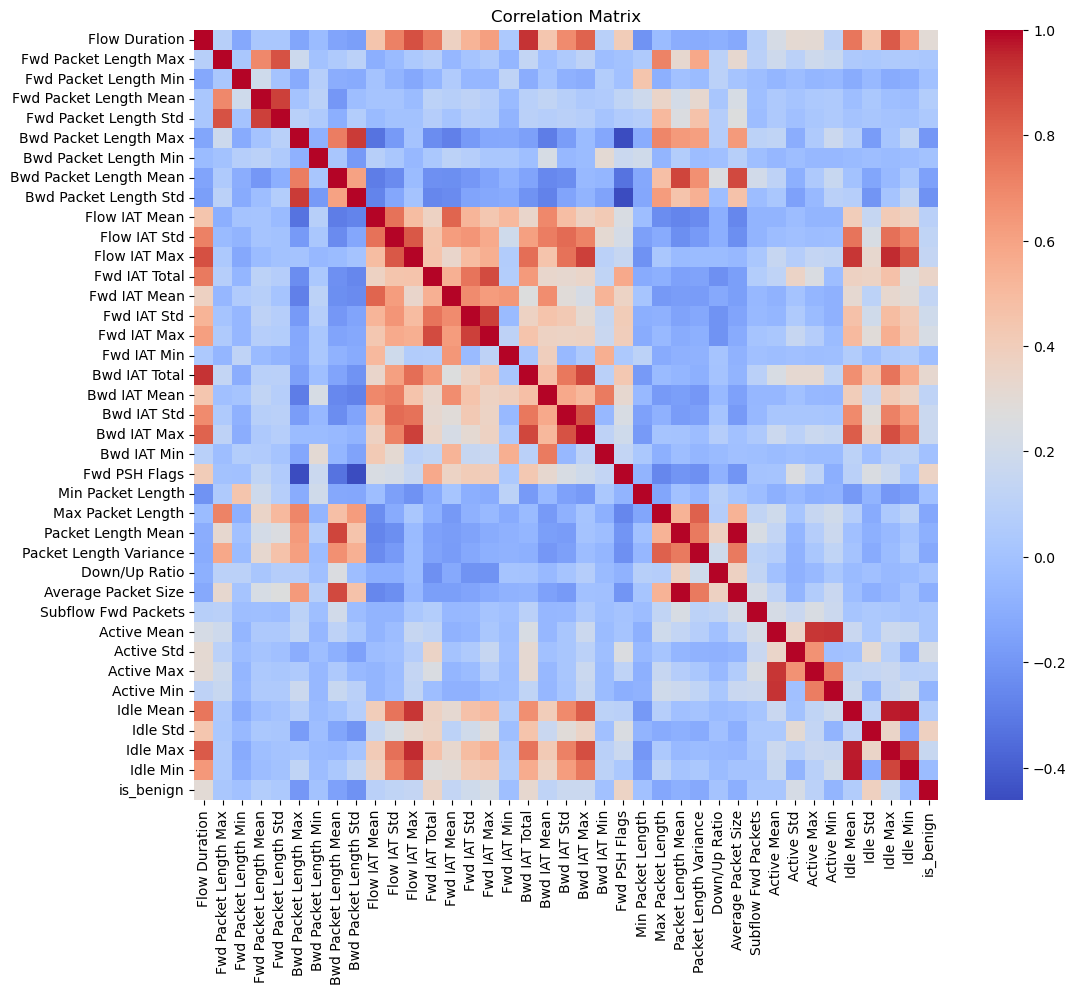

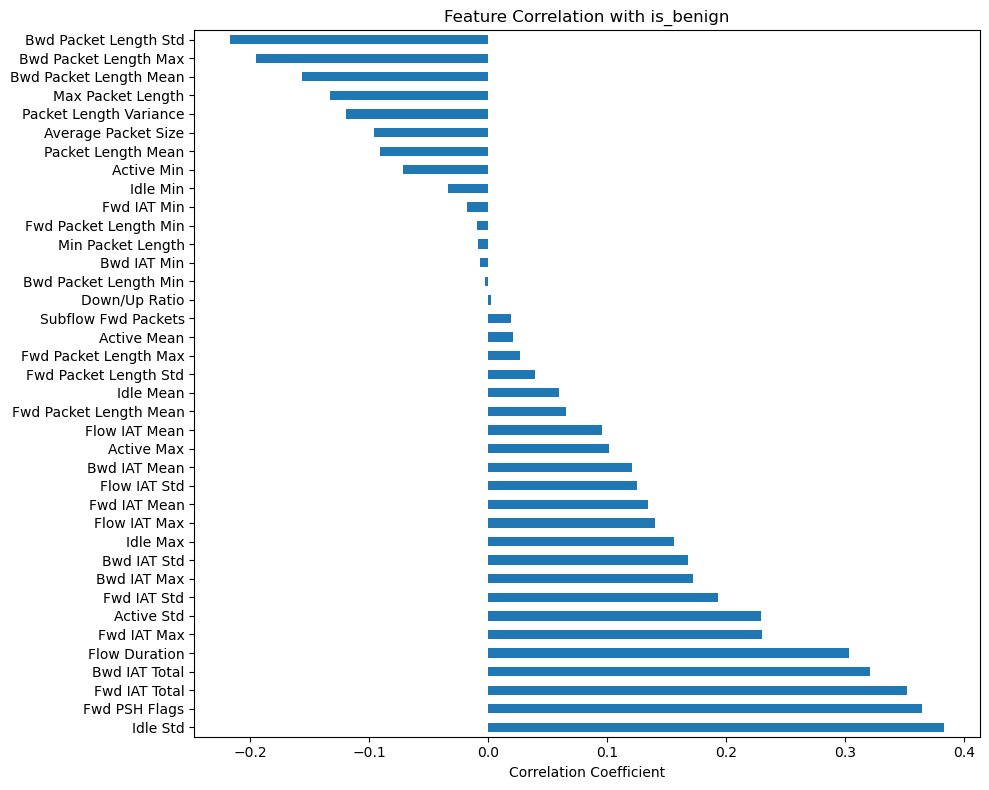

In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url_train = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/main/Selected_data/train.csv"
df_train = pd.read_csv(url_train)

print(df_train.head())

url = "https://raw.githubusercontent.com/magnus-engstroem/IE500-Data-Mining/main/Selected_data/test.csv"
df_test = pd.read_csv( url)

df = pd.concat([df_train, df_test], ignore_index=True, sort=False)



# 1. Attribute Listing and Importance
print("Data Info:")
print(df.info())

# 2. Data Quality
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicates:")
print(df.duplicated().sum())
print("\nDescriptive Statistics:")
print(df.describe())

# 3. Correlation Analysis
# Calculate correlation matrix
corr_matrix = df.corr()

# Check correlation with the target 'is_benign'
if 'is_benign' in df.columns:
    target_corr = corr_matrix['is_benign'].sort_values(ascending=False)
    print("\nCorrelation with 'is_benign':")
    print(target_corr)

    # Plot heatmap of correlations
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    
    # Plot bar chart for correlation with target
    plt.figure(figsize=(10, 8))
    target_corr.drop('is_benign').plot(kind='barh')
    plt.title('Feature Correlation with is_benign')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.savefig('target_correlation.png')
else:
    print("\n'is_benign' column not found.")
